In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


import warnings
warnings.filterwarnings('ignore')


In [212]:
# Load data
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')
print(df_train.shape,df_test.shape)

(1460, 81) (1459, 80)


In [213]:
# column information
print(df_train.columns)
df_train.columns.shape

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(81,)

In [214]:
df_train.drop(['Id'], axis=1, inplace=True)

In [215]:
# Categorical data
print(df_train.dtypes[df_train.dtypes=='object'].shape)
df_train.dtypes[df_train.dtypes=='object']

(43,)


MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [216]:
# Numerical data
print(df_train.dtypes[df_train.dtypes!='object'].shape)
df_train.dtypes[df_train.dtypes!='object']

(37,)


MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## SalePrice

In [217]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

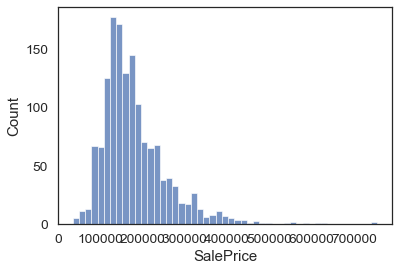

In [218]:
sns.histplot(data=df_train, x='SalePrice')

### Relationship among important features with SalePrice :
1) 'GrLivArea' (Above grade (ground) living area square feet) <br>
2) 'TotalBsmtSF' (Total square feet of basement area) <br>
3) 'OverallQual' (Rates the overall material and finish of the house) <br>
4) 'YearBuilt'.

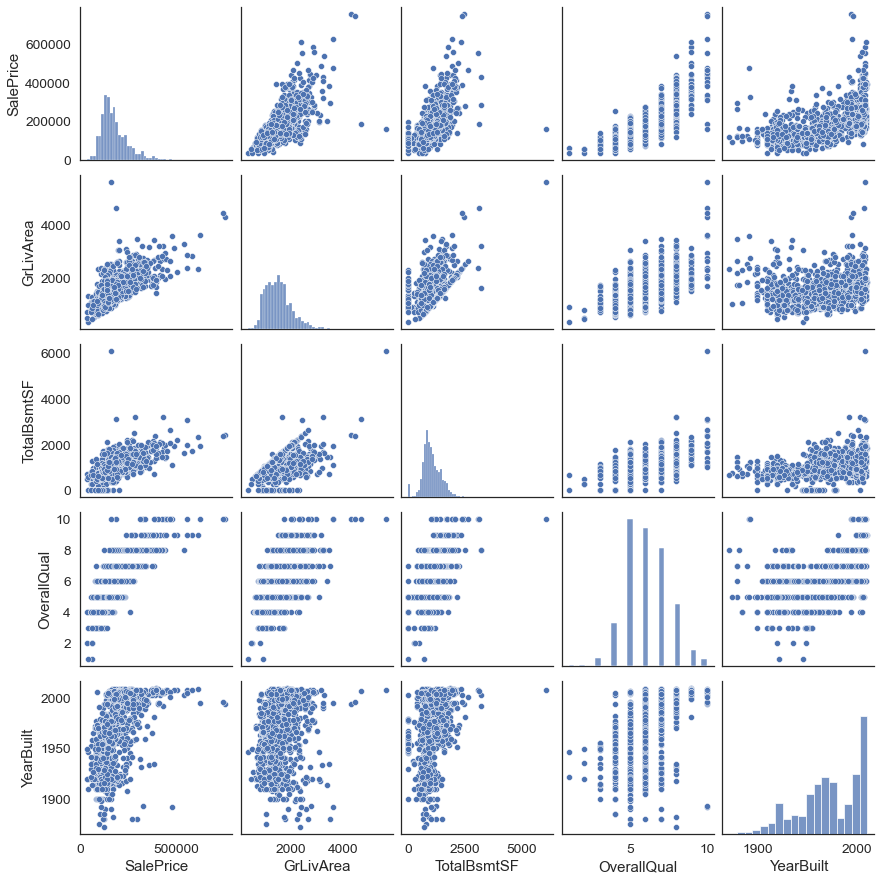

In [219]:
sns.pairplot(data=df_train[['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','YearBuilt']])

It seems all the four features have high positive correlation with SalePrice.

## Variables most correlated with 'SalePrice'


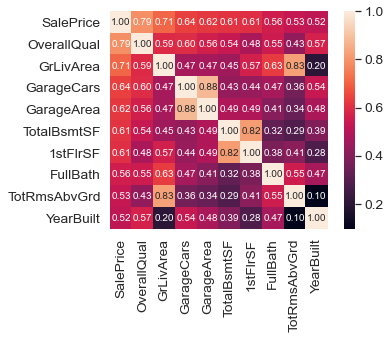

In [220]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


'GarageCars' and 'GarageArea' are redundant features. Even though the correlations with SalesPrice are very similar, let's take 'GarageCars' which is slightly higher.  
'TotalBsmtSF' and '1stFloor' (First Floor square feet) also seem to be redundant. Let's keep 'TotalBsmtSF'.
'FullBath' (Full bathrooms above grade)  
'TotRmsAbvGrd' (Total rooms above grade) and 'GrLivArea' (Above grade (ground) living area square feet) are redundant.
'YearBuilt'


# Feature Engineering

## SalePrice

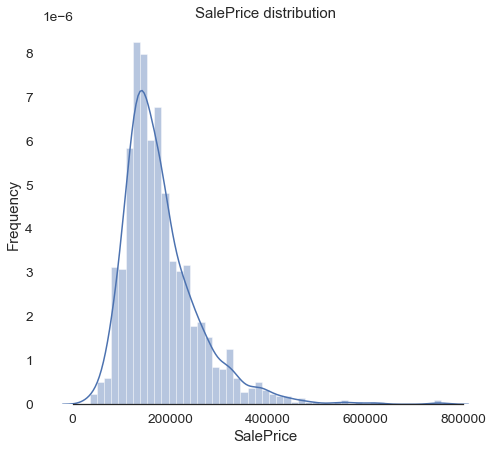

In [221]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

SalePrice feature is skewed to the right. Since most models can't deal with non-normality, I can apply a log(1+x) transfrom to fix it.

In [222]:
# log(1+x) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])


 mu = 12.02 and sigma = 0.40



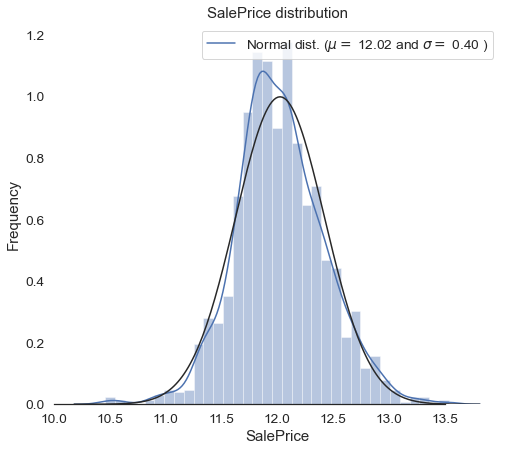

In [223]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm, color="b")

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

## Outliers

In [224]:
# Remove outliers
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [225]:
df_train.shape

(1458, 80)

## Missing data

In [226]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,99.588477
MiscFeature,1404,96.296296
Alley,1367,93.758573
Fence,1177,80.727023
FireplaceQu,690,47.325103
LotFrontage,259,17.764060
GarageType,81,5.555556
GarageCond,81,5.555556
GarageFinish,81,5.555556
GarageQual,81,5.555556


1) Delete features which has more than 15% of outliers (PoolQC ~ LotFrontage) <br>
2) GarageX varaibles can be replaced with GarageCars which has high correlation with SalePrice <br>
3) MasVnrType and MasVnrArea can explained by OverallQual <br>
4) Electrical should be kept and only has 1 missing record. The missing record will be just dropped.

In [227]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [228]:
df_train.isnull().sum().head(10)

MSSubClass      0
MSZoning        0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
dtype: int64

In [231]:
# Split features and labels
train_y = df_train['SalePrice'].reset_index(drop=True)
train_X = df_train.drop(['SalePrice'], axis=1)
commonlabel=[x for x in test_X.columns if x in train_X.columns]
test_X = df_test[commonlabel]

# Combine df_train and test features in order to apply the feature transformation pipeline to the entire dataset
df_all = pd.concat([train_features, test_X]).reset_index(drop=True)
df_all.shape

(2916, 61)

## Fix Skewness in numeric features

In [232]:
numeric=df_all.dtypes[df_all.dtypes!='object'].index.tolist()

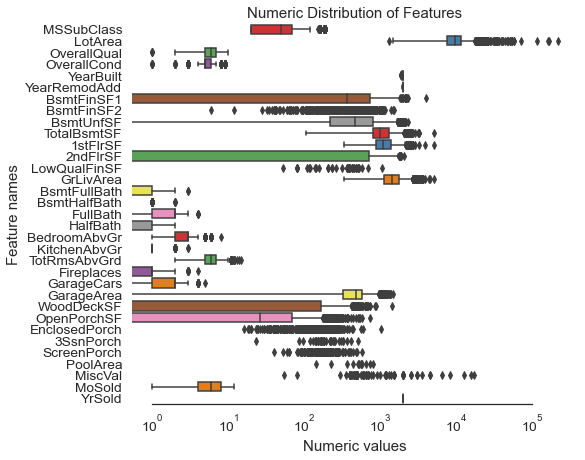

In [233]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [234]:
# Find skewed numerical features
skew_features = df_all[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 18 numerical features with Skew > 0.5 :


MiscVal          21.935910
PoolArea         17.685603
LotArea          13.107212
LowQualFinSF     12.082427
3SsnPorch        11.370087
KitchenAbvGr      4.299698
EnclosedPorch     4.001570
ScreenPorch       3.944305
OpenPorchSF       2.528966
WoodDeckSF        1.844530
dtype: float64

Applying Box-Cox transformation will allow me to normalize data.

In [235]:
# Normalize skewed features
for i in skew_index:
    df_all[i] = boxcox1p(df_all[i], boxcox_normmax(df_all[i] + 1))

## Encode categotical variables

In [236]:
df_all = pd.get_dummies(df_all).reset_index(drop=True)
df_all.shape

(2916, 219)

## Save data

In [237]:
train_X = df_all.iloc[:len(train_y), :]
test_X = df_all.iloc[len(train_y):, :]
X.shape, train_y.shape, test_X.shape

((1457, 285), (1457,), (1459, 219))

In [238]:
# Save processed data
train_X.to_csv('../data/processed/train_X.csv',index=False)
train_y.to_csv('../data/processed/train_y.csv',index=False)
test_X.to_csv('../data/processed/test_X.csv',index=False)